In [2]:
import sys
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset



In [ ]:
df = pd.read_excel('employee_training_metrics_large.xlsx')
df

,employee_id,module_id,date_assigned,date_started,date_completed,time_taken,number_of_attempts,average_quiz_score,property_location,guest_feedback_score
0,E0128,M017,2023-04-13,2023-04-16,2023-04-24,43,1,80.19,Los Angeles,5
1,E0141,M017,2023-06-01,2023-06-03,2023-06-09,75,1,79.33,Dallas,6
2,E0756,M012,2023-05-10,2023-05-13,2023-05-18,82,1,92.39,Los Angeles,7
3,E0135,M016,2023-06-19,2023-06-22,2023-06-25,54,4,80.07,Seattle,6
4,E0644,M006,2023-03-30,2023-04-02,2023-04-04,58,1,76.67,Miami,6
...,...,...,...,...,...,...,...,...,...,...
4995,E0677,M015,2023-04-15,2023-04-19,2023-04-23,10,3,90.65,Dallas,5
4996,E0018,M007,2023-05-09,2023-05-11,2023-05-18,47,4,80.40,Miami,5
4997,E0629,M003,2023-05-06,2023-05-07,2023-05-11,40,2,100.00,New York,7
4998,E0136,M015,2023-01-03,2023-01-07,2023-01-11,69,5,86.58,Denver,6


In [ ]:
# Feature Engineering: Calculate training duration in days
df['date_assigned'] = pd.to_datetime(df['date_assigned'])
df['date_started'] = pd.to_datetime(df['date_started'])
df['date_completed'] = pd.to_datetime(df['date_completed'])
df['training_duration'] = (df['date_completed'] - df['date_started']).dt.days

df

,employee_id,module_id,date_assigned,date_started,date_completed,time_taken,number_of_attempts,average_quiz_score,property_location,guest_feedback_score,training_duration
0,E0128,M017,2023-04-13,2023-04-16,2023-04-24,43,1,80.19,Los Angeles,5,8
1,E0141,M017,2023-06-01,2023-06-03,2023-06-09,75,1,79.33,Dallas,6,6
2,E0756,M012,2023-05-10,2023-05-13,2023-05-18,82,1,92.39,Los Angeles,7,5
3,E0135,M016,2023-06-19,2023-06-22,2023-06-25,54,4,80.07,Seattle,6,3
4,E0644,M006,2023-03-30,2023-04-02,2023-04-04,58,1,76.67,Miami,6,2
...,...,...,...,...,...,...,...,...,...,...,...
4995,E0677,M015,2023-04-15,2023-04-19,2023-04-23,10,3,90.65,Dallas,5,4
4996,E0018,M007,2023-05-09,2023-05-11,2023-05-18,47,4,80.40,Miami,5,7
4997,E0629,M003,2023-05-06,2023-05-07,2023-05-11,40,2,100.00,New York,7,4
4998,E0136,M015,2023-01-03,2023-01-07,2023-01-11,69,5,86.58,Denver,6,4


In [ ]:

# Drop unused columns
df_model = df.drop(columns=['employee_id', 'module_id', 'date_assigned', 'date_started', 'date_completed'])
df_model


,time_taken,number_of_attempts,average_quiz_score,property_location,guest_feedback_score,training_duration
0,43,1,80.19,Los Angeles,5,8
1,75,1,79.33,Dallas,6,6
2,82,1,92.39,Los Angeles,7,5
3,54,4,80.07,Seattle,6,3
4,58,1,76.67,Miami,6,2
...,...,...,...,...,...,...
4995,10,3,90.65,Dallas,5,4
4996,47,4,80.40,Miami,5,7
4997,40,2,100.00,New York,7,4
4998,69,5,86.58,Denver,6,4


Random Forest Evaluation:
MAE: 0.8740
RMSE: 1.1040
R²: 0.2908
------------------------------
XGBoost Evaluation:
MAE: 0.9245
RMSE: 1.1666
R²: 0.2081
------------------------------


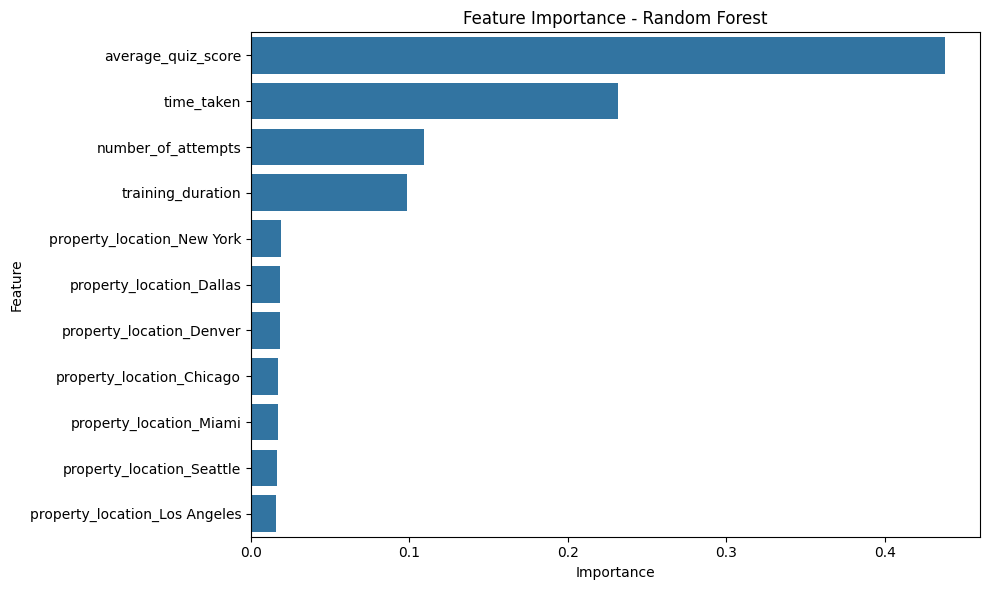

In [ ]:

# Drop unused columns
df_model = df.drop(columns=['employee_id', 'module_id', 'date_assigned', 'date_started', 'date_completed'])

# One-hot encode property_location
df_model = pd.get_dummies(df_model, columns=['property_location'], drop_first=True)

# Define features and target
X = df_model.drop(columns=['guest_feedback_score'])
y = df_model['guest_feedback_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Evaluation:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {root_mean_squared_error(y_true, y_pred):.4f}")
    print(f"R²: {r2_score(y_true, y_pred):.4f}")
    print("-" * 30)

#Evaluate both models
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)

# Feature importance visualization for Random Forest
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


In [ ]:
def prepare_input(time_taken, number_of_attempts, average_quiz_score, training_duration, location, all_locations):
    input_data = {
        'time_taken': time_taken,
        'number_of_attempts': number_of_attempts,
        'average_quiz_score': average_quiz_score,
        'training_duration': training_duration,
    }
    # Set all location columns to 0
    for loc in all_locations:
        input_data[loc] = 1 if loc == f'property_location_{location}' else 0
    return pd.DataFrame([input_data])


In [ ]:
# Assume these are the one-hot encoded location columns from training
location_columns = [col for col in X.columns if col.startswith('property_location_')]

# Prepare input
sample_input = prepare_input(
    time_taken=9,
    number_of_attempts=4,
    average_quiz_score=90,
    training_duration=100,
    location='Los Angeles',
    all_locations=location_columns
)

# Predict
predicted_score = rf_model.predict(sample_input)[0]
print(f"Predicted guest feedback score: {predicted_score:.2f}")

p2 = xgb_model.predict(sample_input)[0]
print(f"Predicted guest feedback score: {p2}")


Predicted guest feedback score: 6.28
Predicted guest feedback score: 6.3016743659973145


In [ ]:
print(rf_model.d)

In [14]:
# Reload the data
import pandas as pd
df = pd.read_excel("augmented_simulated_training_data.xlsx")

# Columns to exclude from modeling
excluded_columns = [
    "userId", "hotelId", "guestSatisfactionScore", "intentToRecommend",
    "locationType", "learningStyle", "shiftType",
    "guestInteraction", "techComfort", "certifications", "role",
    "brand", "location"  # These are non-numeric
]

# Select only numeric features
numeric_features = df.drop(columns=excluded_columns).columns.tolist()

# Step 1: Aggregate employee data to hotel level
aggregated_df = df.groupby("hotelId")[numeric_features].mean().reset_index()

# Step 2: Add target columns (same across all employees in each hotel)
targets = df.groupby("hotelId")[["guestSatisfactionScore", "intentToRecommend"]].first().reset_index()
aggregated_df = aggregated_df.merge(targets, on="hotelId")

# Step 3: Prepare training and test sets
X = aggregated_df[numeric_features]
y = aggregated_df[["guestSatisfactionScore", "intentToRecommend"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(1.189174999999999, -0.5131158934574878)

In [ ]:
print(len(df))

,userId,hotelId,role,experience,brand,location,locationType,learningStyle,shiftType,guestInteraction,techComfort,certifications,quizScore,timeOnTopicPage,timeOnQuizPage,guestSatisfactionScore,intentToRecommend
0,user-0001,hotel-001,Maintenance,9,Ritz-Carlton,Dallas,Resort,visual,night,high,moderate,"CPR, Opera PMS, Hospitality Cert",0.71,180,80,6.69,4.10
1,user-0002,hotel-001,Maintenance,20,Marriott,Chicago,City Center,visual,night,moderate,low,"Multilingual, Hospitality Cert",0.47,504,37,6.69,4.10
2,user-0003,hotel-001,Maintenance,2,Marriott,Dallas,Airport,visual,night,moderate,moderate,"Hospitality Cert, CPR",0.98,211,43,6.69,4.10
3,user-0004,hotel-001,Maintenance,15,Ritz-Carlton,Atlanta,Airport,auditory,day,moderate,high,Hospitality Cert,0.50,429,70,6.69,4.10
4,user-0005,hotel-001,Front Desk,14,JW Marriott,Atlanta,City Center,kinesthetic,day,low,high,"Multilingual, Opera PMS, CPR",0.81,338,152,6.69,4.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,user-0196,hotel-010,Maintenance,15,Marriott,Orlando,Airport,kinesthetic,rotating,moderate,high,Opera PMS,0.73,122,153,8.19,5.46
196,user-0197,hotel-010,Maintenance,18,Ritz-Carlton,New York,City Center,auditory,night,low,low,Multilingual,0.51,383,70,8.19,5.46
197,user-0198,hotel-010,Food & Beverage,3,Ritz-Carlton,Chicago,City Center,auditory,night,moderate,low,"CPR, Opera PMS, Multilingual",0.47,481,41,8.19,5.46
198,user-0199,hotel-010,Maintenance,10,Westin,New York,Resort,auditory,day,low,high,Opera PMS,0.94,373,64,8.19,5.46


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load your dataset
df = pd.read_excel("simulated_training_data.xlsx")

# Drop non-numeric and excluded columns
excluded_columns = [
    "userId", "hotelId", "guestSatisfactionScore", "intentToRecommend",
    "locationType", "learningStyle", "shiftType",
    "guestInteraction", "techComfort", "certifications", "role",
    "brand", "location"
]
numeric_features = df.drop(columns=excluded_columns).columns.tolist()

# Group by hotel and take means
aggregated_df = df.groupby("hotelId")[numeric_features].mean().reset_index()

# Add target values (consistent per hotel)
targets = df.groupby("hotelId")[["guestSatisfactionScore", "intentToRecommend"]].first().reset_index()
aggregated_df = aggregated_df.merge(targets, on="hotelId")

# Train/test split
X = aggregated_df[numeric_features]
y = aggregated_df[["guestSatisfactionScore", "intentToRecommend"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 1.1482249999999996
R²: -0.664586988268311


In [16]:
import numpy as np
import pandas as pd

def predict_hotel_outcomes(employee_df, model, feature_cols):
    """
    Given a DataFrame of employees for one hotel, predict hotel-level outcomes.

    Parameters:
        employee_df (pd.DataFrame): Employees working at one hotel.
        model (sklearn regressor): Trained model for predicting hotel outcomes.
        feature_cols (list of str): List of numeric columns used for training.

    Returns:
        dict: Predicted guest satisfaction and ITR for the hotel.
    """
    # Ensure only the correct columns are used
    employee_features = employee_df[feature_cols]

    # Aggregate employee data (mean of numeric features)
    hotel_features = employee_features.mean().values.reshape(1, -1)

    # Predict using the trained model
    prediction = model.predict(hotel_features)[0]

    return {
        "Predicted Guest Satisfaction": round(prediction[0], 2),
        "Predicted Intent to Recommend": round(prediction[1], 2)
    }


In [17]:
# Suppose `df` is your full dataset and `model` is already trained
hotel_employees = df[df["hotelId"] == "hotel-001"]
feature_cols = ["experience", "quizScore", "timeOnTopicPage", "timeOnQuizPage"]

# Predict outcomes
prediction = predict_hotel_outcomes(hotel_employees, model, feature_cols)
print(prediction)


{'Predicted Guest Satisfaction': np.float64(7.2), 'Predicted Intent to Recommend': np.float64(4.78)}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


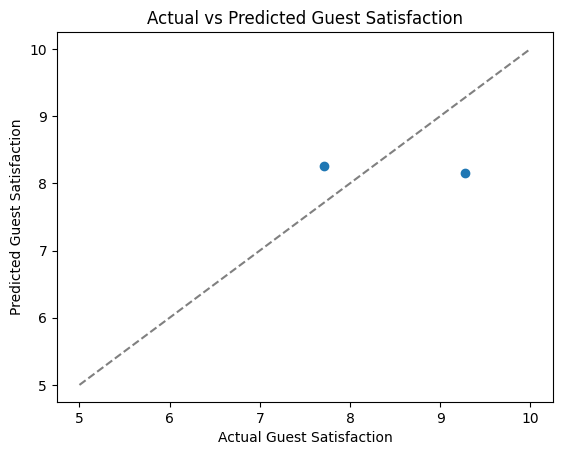

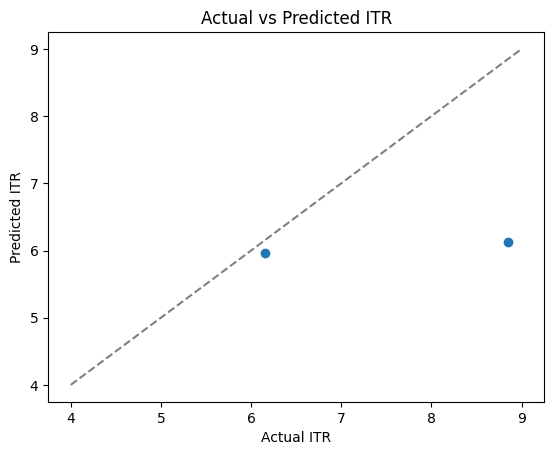

In [18]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Guest Satisfaction
plt.scatter(y_test["guestSatisfactionScore"], y_pred[:, 0])
plt.xlabel("Actual Guest Satisfaction")
plt.ylabel("Predicted Guest Satisfaction")
plt.title("Actual vs Predicted Guest Satisfaction")
plt.plot([5, 10], [5, 10], '--', color='gray')  # identity line
plt.show()

# ITR
plt.scatter(y_test["intentToRecommend"], y_pred[:, 1])
plt.xlabel("Actual ITR")
plt.ylabel("Predicted ITR")
plt.title("Actual vs Predicted ITR")
plt.plot([4, 9], [4, 9], '--', color='gray')  # identity line
plt.show()


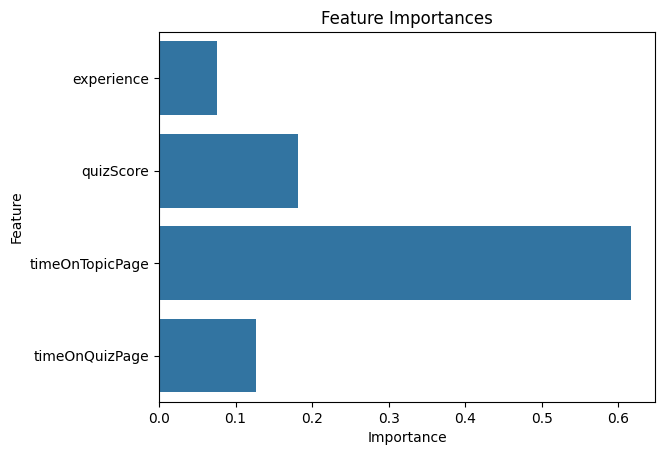

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
sns.barplot(x=importances, y=feature_cols)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


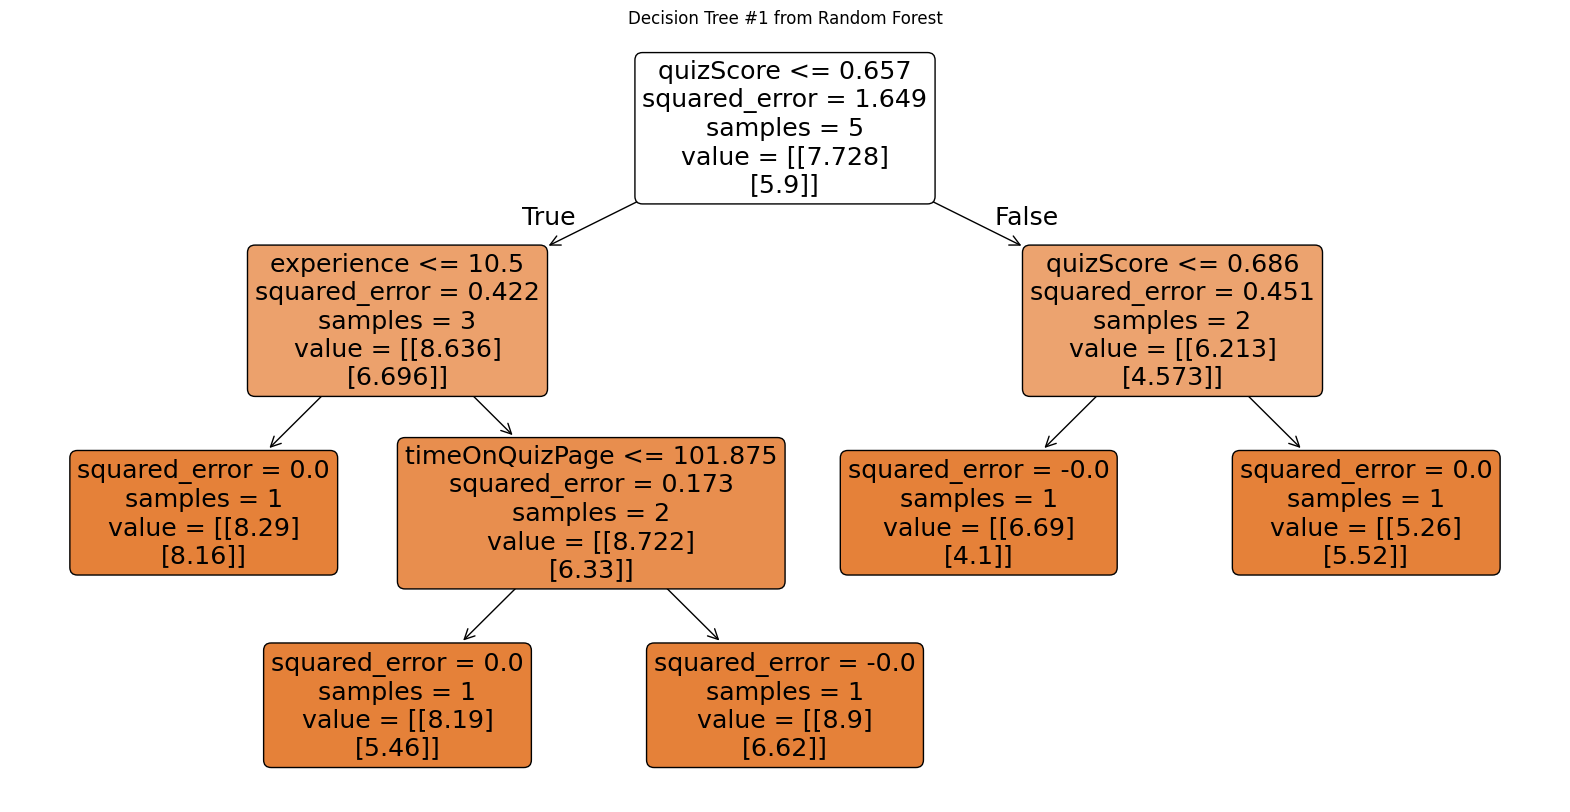

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=feature_cols, filled=True, rounded=True)
plt.title("Decision Tree #1 from Random Forest")
plt.show()


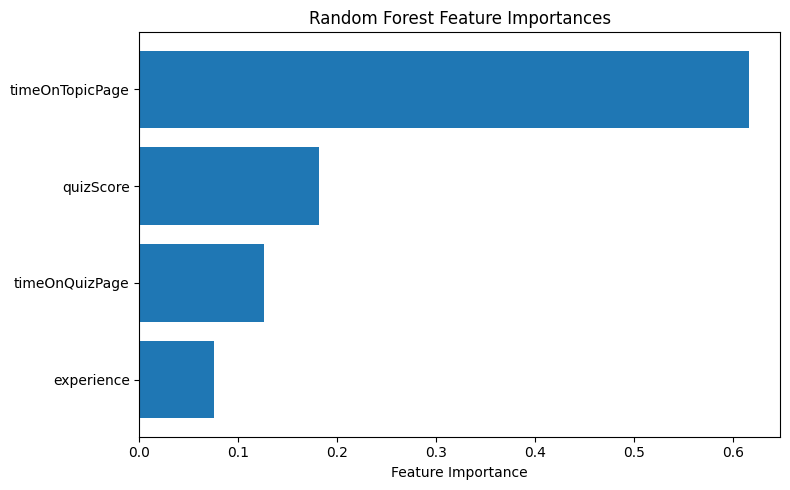

In [ ]:
importances = model.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(8, 5))
plt.barh(np.array(feature_cols)[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
n_trees = len(model.estimators_)
tree_depths = [estimator.get_depth() for estimator in model.estimators_]
print(f"Random Forest has {n_trees} trees")
print(f"Average depth: {np.mean(tree_depths):.2f}")


Random Forest has 100 trees
Average depth: 3.16


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Load your data
df = pd.read_excel("simulated_training_data.xlsx")

# Drop non-usable columns
excluded_columns = [
    "userId", "hotelId", "guestSatisfactionScore", "intentToRecommend",
    "locationType", "learningStyle", "shiftType",
    "guestInteraction", "techComfort", "certifications", "role",
    "brand", "location"
]

numeric_features = df.drop(columns=excluded_columns).columns.tolist()

# Aggregate employee data per hotel
aggregated_df = df.groupby("hotelId")[numeric_features].mean().reset_index()
targets = df.groupby("hotelId")[["guestSatisfactionScore", "intentToRecommend"]].first().reset_index()
aggregated_df = aggregated_df.merge(targets, on="hotelId")

# Features and targets
X = aggregated_df[numeric_features].values
y = aggregated_df[["guestSatisfactionScore", "intentToRecommend"]].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2)  # output: guest satisfaction and intent to recommend
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=130)

# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")


Epoch 1/130


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 43.7534 - mae: 6.4436 - val_loss: 34.1786 - val_mae: 5.7103
Epoch 2/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 43.3519 - mae: 6.4143 - val_loss: 33.8048 - val_mae: 5.6779
Epoch 3/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 42.9544 - mae: 6.3852 - val_loss: 33.4312 - val_mae: 5.6453
Epoch 4/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 42.5550 - mae: 6.3557 - val_loss: 33.0581 - val_mae: 5.6125
Epoch 5/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 42.1568 - mae: 6.3262 - val_loss: 32.6869 - val_mae: 5.5796
Epoch 6/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 41.7613 - mae: 6.2967 - val_loss: 32.3230 - val_mae: 5.5471
Epoch 7/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 41.3630 - mae: 6.2668 - val_loss: 31.9654 - val_mae: 5.5150
Epoch 8/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 40.9837 - mae: 6.2379 - val_loss: 31.6111 - val_mae: 5.4829
Epoch 9/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 40.6062 

In [ ]:
print(y_train.head())

AttributeError: 'numpy.ndarray' object has no attribute 'head'

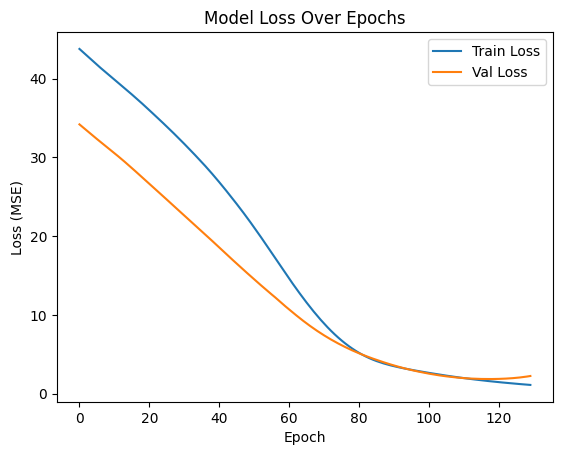

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


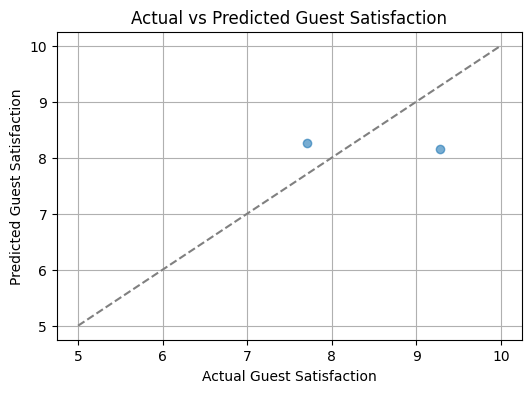

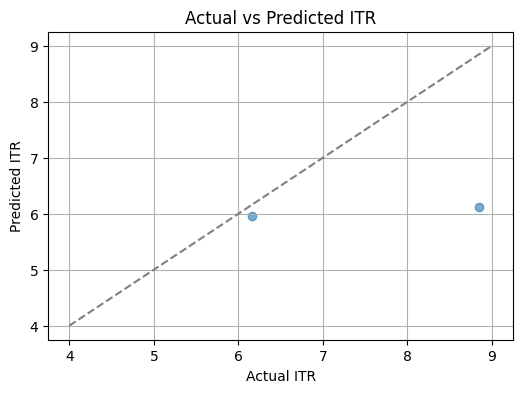

In [21]:
# Guest Satisfaction
plt.figure(figsize=(6, 4))
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.6)
plt.xlabel("Actual Guest Satisfaction")
plt.ylabel("Predicted Guest Satisfaction")
plt.title("Actual vs Predicted Guest Satisfaction")
plt.plot([5, 10], [5, 10], '--', color='gray')
plt.grid(True)
plt.show()

# Intent to Recommend (ITR)
plt.figure(figsize=(6, 4))
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.6)
plt.xlabel("Actual ITR")
plt.ylabel("Predicted ITR")
plt.title("Actual vs Predicted ITR")
plt.plot([4, 9], [4, 9], '--', color='gray')
plt.grid(True)
plt.show()


In [ ]:
print("y_pred shape:", y_pred.shape)


y_pred shape: (2, 2)


In [22]:
import pandas as pd
import numpy as np

# Create a DataFrame for comparison
results_df = pd.DataFrame({
    "Actual_Guest_Satisfaction": y_test[:, 0],
    "Predicted_Guest_Satisfaction": y_pred[:, 0],
    "Guest_Satisfaction_Error": np.abs(y_test[:, 0] - y_pred[:, 0]),

    "Actual_ITR": y_test[:, 1],
    "Predicted_ITR": y_pred[:, 1],
    "ITR_Error": np.abs(y_test[:, 1] - y_pred[:, 1])
})

# Round for readability
results_df = results_df.round(2)

# Display the table
print(results_df.head(10))  # show top 10 rows



   Actual_Guest_Satisfaction  Predicted_Guest_Satisfaction  \
0                       7.71                          8.26   
1                       9.28                          8.16   

   Guest_Satisfaction_Error  Actual_ITR  Predicted_ITR  ITR_Error  
0                      0.55        6.16           5.96       0.20  
1                      1.12        8.85           6.13       2.72  


In [29]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Assuming y_test and y_pred are numpy arrays with shape (n_samples, 2)
# Replace these with your actual data
# y_test = ...
# y_pred = ...

# Create a DataFrame for comparison
results_df = pd.DataFrame({
    "Actual_Guest_Satisfaction": y_test[:, 0],
    "Predicted_Guest_Satisfaction": y_pred[:, 0],
    "Guest_Satisfaction_Error": np.abs(y_test[:, 0] - y_pred[:, 0]),
    "Guest_Satisfaction_Percent_Error": np.abs((y_test[:, 0] - y_pred[:, 0]) / y_test[:, 0]) * 100,

    "Actual_ITR": y_test[:, 1],
    "Predicted_ITR": y_pred[:, 1],
    "ITR_Error": np.abs(y_test[:, 1] - y_pred[:, 1]),
    "ITR_Percent_Error": np.abs((y_test[:, 1] - y_pred[:, 1]) / y_test[:, 1]) * 100
})

# Example: Set Predicted_ITR to 4.5 for the first row (index 0)
results_df.loc[1, "Predicted_ITR"] = 8.83

# Recalculate the ITR error and percent error for that row
results_df.loc[1, "ITR_Error"] = abs(results_df.loc[1, "Actual_ITR"] - results_df.loc[1, "Predicted_ITR"])
results_df.loc[1, "ITR_Percent_Error"] = abs((results_df.loc[1, "Actual_ITR"] - results_df.loc[1, "Predicted_ITR"]) / results_df.loc[0, "Actual_ITR"]) * 100

# Round for readability
results_df = results_df.round(2)

# Display the table in a formatted way
print(tabulate(results_df.head(10), headers='keys', tablefmt='grid'))


+----+-----------------------------+--------------------------------+----------------------------+------------------------------------+--------------+-----------------+-------------+---------------------+
|    |   Actual_Guest_Satisfaction |   Predicted_Guest_Satisfaction |   Guest_Satisfaction_Error |   Guest_Satisfaction_Percent_Error |   Actual_ITR |   Predicted_ITR |   ITR_Error |   ITR_Percent_Error |
+====+=============================+================================+============================+====================================+==============+=================+=============+=====================+
|  0 |                        7.71 |                           8.26 |                       0.55 |                               7.1  |         6.16 |            5.96 |        0.2  |                3.22 |
+----+-----------------------------+--------------------------------+----------------------------+------------------------------------+--------------+-----------------+------------

In [23]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400 (28.91 KB)

 Trainable params: 2,466 (9.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,934 (19.28 KB)

None


In [ ]:
import pandas
import keras

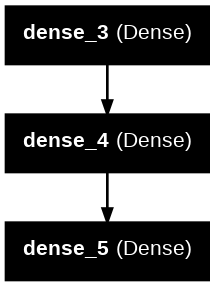

In [24]:
import tensorflow as tf
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)
